# Plotting discrete choropleth rasters

In [1]:
import rioxarray as rxr
import matplotlib.pyplot as plt
import geomappy as mp
import numpy as np
import os
os.chdir("../../../")

Loading a global raster indicating climate zones (from Beck et al, 2019)

In [2]:
r = rxr.open_rasterio("data/climate_downsampled_10_display.tif")
a = r.values[0]

Plotting the raster shows that the climate zones are classified 1 to 30, instead of being labelled with their standard A-E formulation

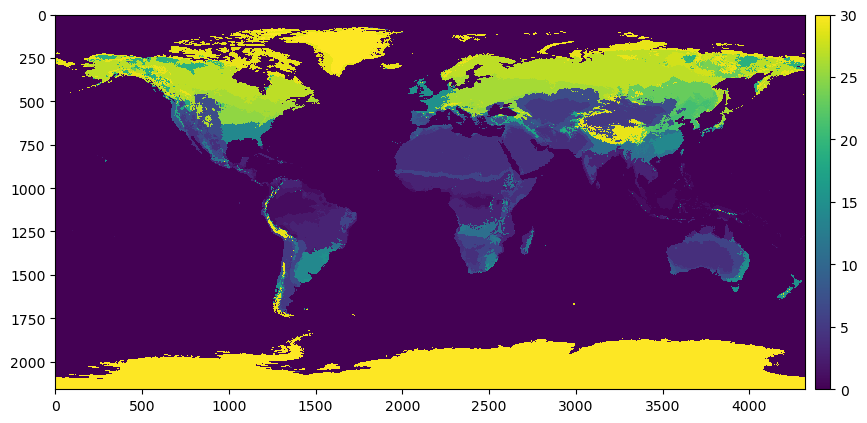

In [3]:
mp.plot_raster(a, figsize=(10, 10))
plt.show()

To map these numbers to their correct labels they are loaded from a text file:

In [4]:
colors = [(1, 1, 1)]
bins = [0]
labels = ["Water"]
with open("data/koppen_legend.txt") as f:
    for line in f:
        line = line.strip()
        try:
            int(line[0])
            rgb = [int(c) / 255 for c in line[line.find('[') + 1:-1].split()]
            colors.append(rgb)
            labels.append(line.split()[1])
            bins.append(int(line[:line.find(':')]))
        except:
            pass

The resulting lists `colors`, `labels` and `bins` provide the information needed for plotting.

In [5]:
colors

[(1, 1, 1),
 [0.0, 0.0, 1.0],
 [0.0, 0.47058823529411764, 1.0],
 [0.27450980392156865, 0.6666666666666666, 0.9803921568627451],
 [1.0, 0.0, 0.0],
 [1.0, 0.5882352941176471, 0.5882352941176471],
 [0.9607843137254902, 0.6470588235294118, 0.0],
 [1.0, 0.8627450980392157, 0.39215686274509803],
 [1.0, 1.0, 0.0],
 [0.7843137254901961, 0.7843137254901961, 0.0],
 [0.5882352941176471, 0.5882352941176471, 0.0],
 [0.5882352941176471, 1.0, 0.5882352941176471],
 [0.39215686274509803, 0.7843137254901961, 0.39215686274509803],
 [0.19607843137254902, 0.5882352941176471, 0.19607843137254902],
 [0.7843137254901961, 1.0, 0.3137254901960784],
 [0.39215686274509803, 1.0, 0.3137254901960784],
 [0.19607843137254902, 0.7843137254901961, 0.0],
 [1.0, 0.0, 1.0],
 [0.7843137254901961, 0.0, 0.7843137254901961],
 [0.5882352941176471, 0.19607843137254902, 0.5882352941176471],
 [0.5882352941176471, 0.39215686274509803, 0.5882352941176471],
 [0.6666666666666666, 0.6862745098039216, 1.0],
 [0.35294117647058826, 0.4705

In [6]:
print(*labels)

Water Af Am Aw BWh BWk BSh BSk Csa Csb Csc Cwa Cwb Cwc Cfa Cfb Cfc Dsa Dsb Dsc Dsd Dwa Dwb Dwc Dwd Dfa Dfb Dfc Dfd ET EF


In [7]:
print(*bins)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30


They are used as parameters in the ``plot_classified_raster`` function

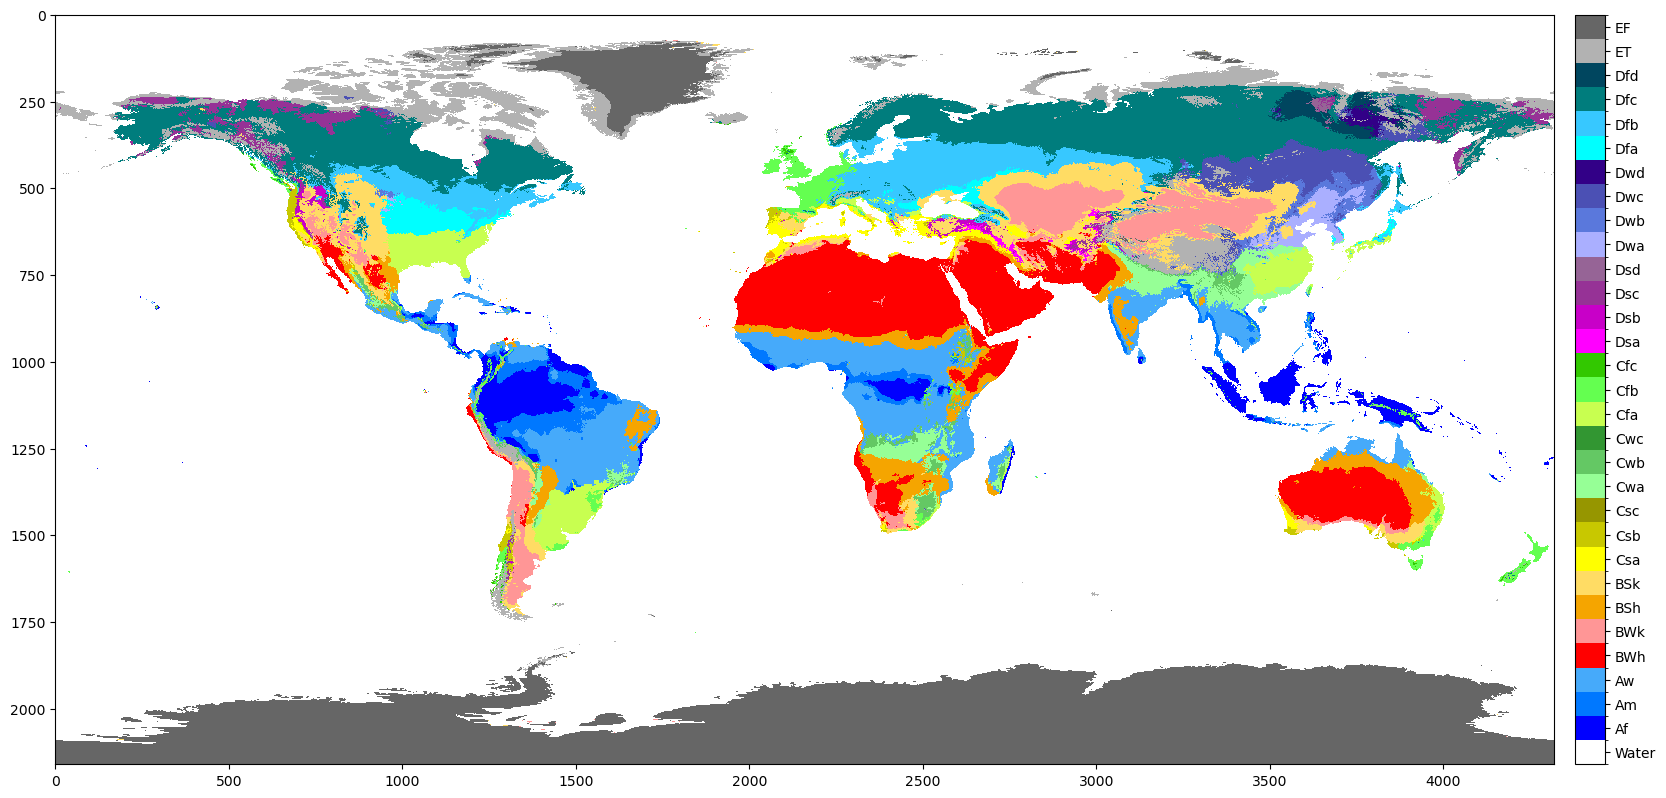

In [8]:
mp.plot_classified_raster(a, levels=bins, labels=labels, colors=colors, figsize=(20, 20), suppress_warnings=True)
plt.show()

Also a legend can be used

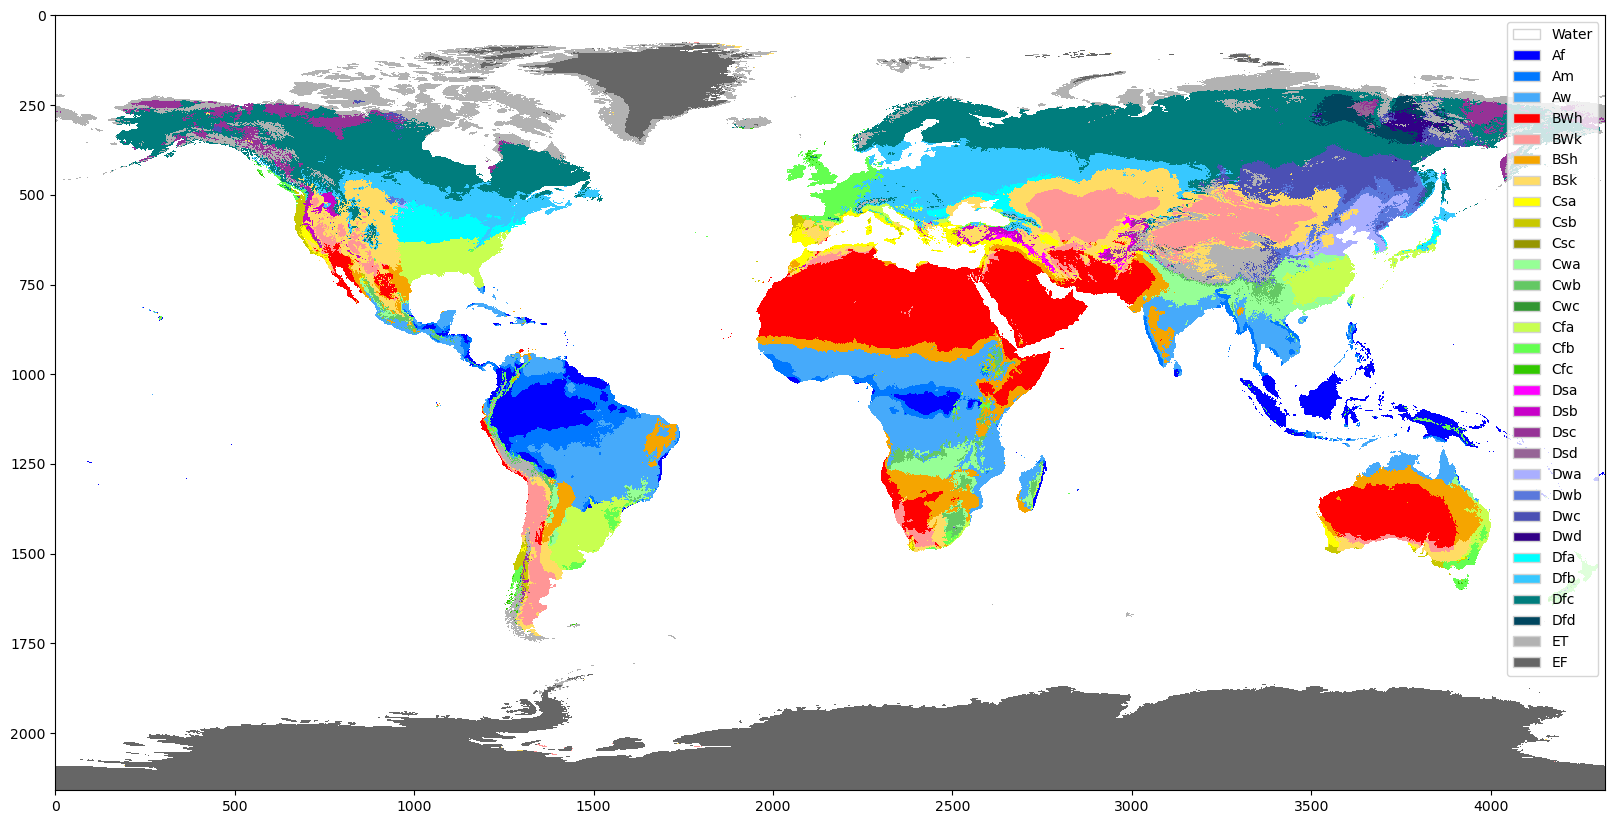

In [9]:
mp.plot_classified_raster(a, levels=bins, labels=labels, colors=colors, figsize=(20, 20), suppress_warnings=True, legend='legend')
plt.show()

Again this can be easily enhanced with a basemap

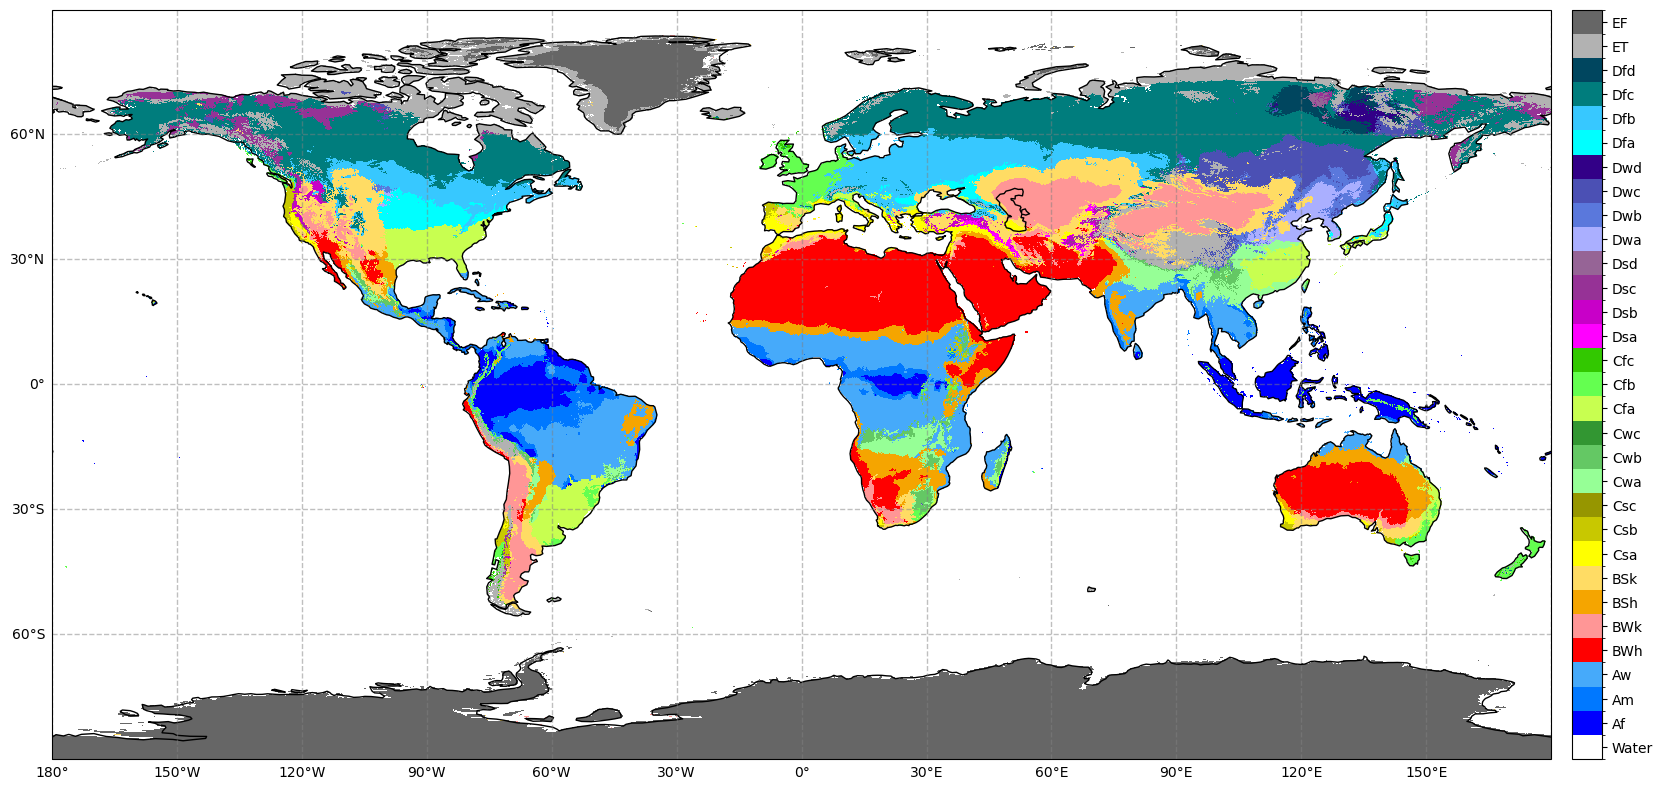

In [10]:
ax = mp.basemap(figsize=(20, 20))
ax.coastlines()
mp.add_gridlines(ax, 30)
mp.add_ticks(ax, 30)
bounds = r.rio.bounds()
extent = bounds[0], bounds[2], bounds[1], bounds[3]
mp.plot_classified_raster(a, levels=bins, labels=labels, colors=colors, suppress_warnings=True, legend='colorbar', 
                          ax=ax, extent=extent)
plt.show()